<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter18/detecting_lanes_in_the_image_of_a_road.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/vgd22go8a6k721t/road_image.png

--2020-10-05 17:11:28--  https://www.dropbox.com/s/vgd22go8a6k721t/road_image.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vgd22go8a6k721t/road_image.png [following]
--2020-10-05 17:11:29--  https://www.dropbox.com/s/raw/vgd22go8a6k721t/road_image.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf145594d0280419127c347de41.dl.dropboxusercontent.com/cd/0/inline/BAspiWKFI1iwzcOvDUuAPzYC2BCDMeSMTcfG75YdsfJRG7ugn_lq6JpnTUwL8Ru40q0FWI3w3U8t8MLgu6in-_qZ_KKEaThWkGkbRZCCuEV--RroiMHHkph3hhfhJ-LtN80/file# [following]
--2020-10-05 17:11:29--  https://ucf145594d0280419127c347de41.dl.dropboxusercontent.com/cd/0/inline/BAspiWKFI1iwzcOvDUuAPzYC2BCDMeSMTcfG75YdsfJRG7ugn_lq6JpnTUwL8Ru40q0FWI3w3U8t8MLgu6in-_qZ_KKEaThWkGkbRZCCuEV-

In [2]:
!pip install torch_snippets
from torch_snippets import show, read, subplots, cv2, np
IMG = read('road_image.png')
img = np.uint8(IMG.copy())

     |████████████████████████████████| 36.7MB 1.3MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=32c30333044efc81f5216fc3900c6fda42644cc5ac348068ad26a29e56745408
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars


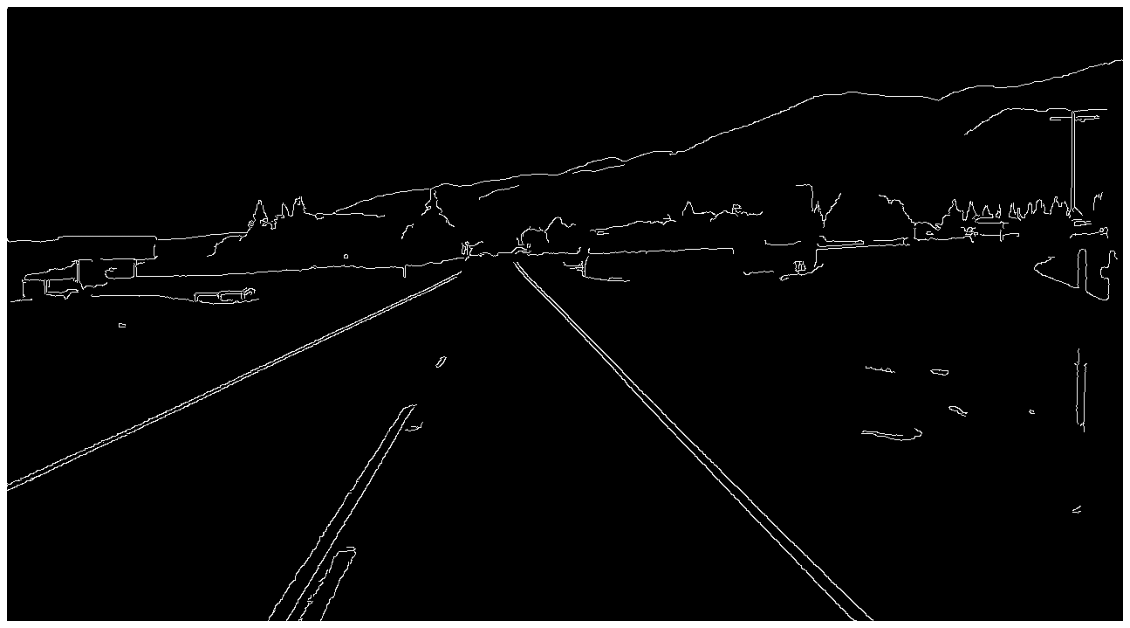

In [3]:
edges = cv2.Canny(img,50,150)
show(edges)

In [4]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)

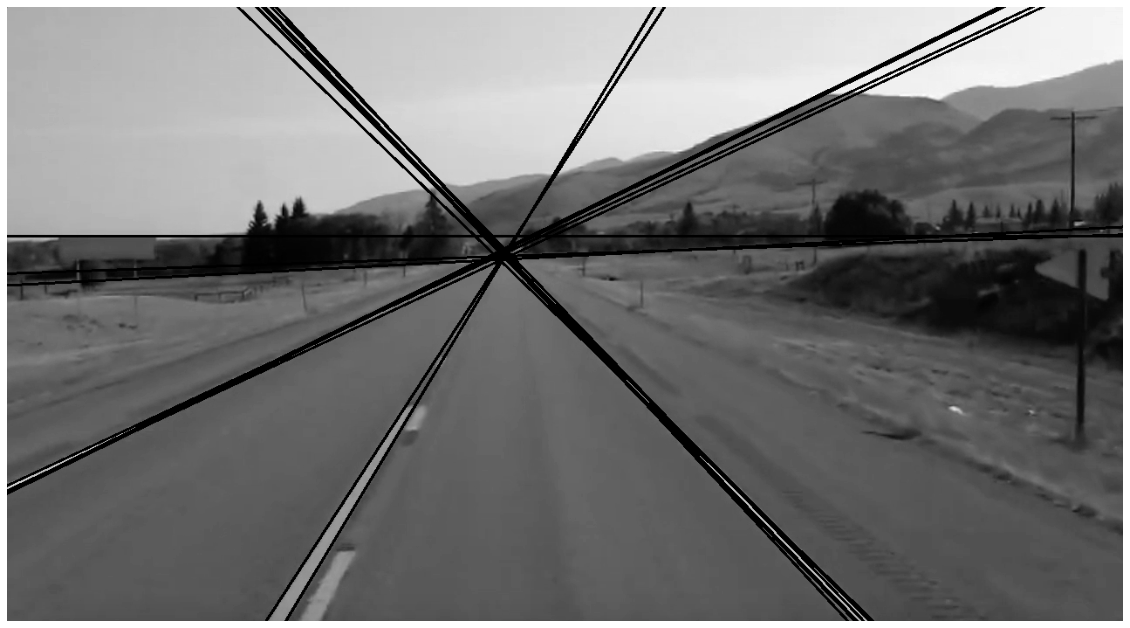

In [5]:
lines = lines[:,0,:]
for rho,theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 10000*(-b))
    y1 = int(y0 + 10000*(a))
    x2 = int(x0 - 10000*(-b))
    y2 = int(y0 - 10000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

show(img)